# Constraint forces | Rolling

[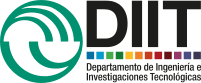](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Problem
**Cylinder rolling over an inclined plane**
[Marion ex. 7.5]

The figure shows a cylinder rolling down over an inclined plane.

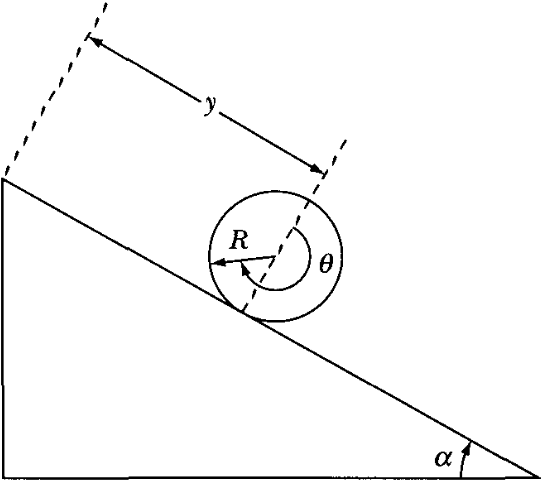

1. Find the equations of motion, 
2. the angular acceleration,
3. and the constraint forces.

## Solution
The Lagrangian formulation is a way to solving for the dynamics avoiding having to deal with constraint forces. But, usually, knowing these forces is needed by engineers when they design systems.

In [1]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me
me.init_vprinting() # dot notation for velocity and acceleration

In [2]:
# Physical parameters
m1, alpha, R, g = sm.symbols('m, alpha, R, g', positive=True)

In [3]:
e = me.ReferenceFrame('e') # Cartesian frame of reference
g_vector = g* e.y # vector for acceleration due to gravity in this frame of reference
y, zeta = me.dynamicsymbols('y, theta')

### Constraints
The constraint for rolling can be written as

$$
f(y,\theta) = y - R \theta = 0,
$$
where $\hat{y}$ is directed down the slope.

In [4]:
f1 = sm.Eq(sm.Function('f_1')(y, zeta), y- R* zeta) # Constraint 1 as an homogeneous function
f1

### Lagrangian
The moment of inertia of the cylinder about its axis is $I= M R^2$, and the kinetic energy is

$$
T = \frac{M}{2} \dot{y}^2 + \frac{I}{2} \dot{\theta}^2 = \frac{M}{2} \left( \dot{y}^2+ \frac{1}{2} R^2 \dot{\theta}^2 \right).
$$

The potential energy is from the gravitational field
$$
V = M g (l - y ) \sin(\alpha),
$$
where $V = 0$ at the base and $l$ is the length of the inclined plane.
Therefore,
$$
\mathcal{L}(y, \dot{y}, \dot{\theta}) = \frac{M}{2} \left( \dot{y}^2+ \frac{1}{2} R^2 \dot{\theta}^2 \right) - M g (l - y ) \sin(\alpha).
$$

### Euler-Lagrange with multipliers
Since we are interested in the constraint force, the constraint $f(y,\theta)$ is not used to reduce the number of degrees of freedom. Instead, we set

$$
\left\{
  \begin{array}{l} 
    \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{y}} \mathcal{L}
    - \frac{\partial}{\partial y} \mathcal{L}
    =
    \lambda \frac{\partial}{\partial y} f 
    \\
    \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{\theta}} \mathcal{L}
    - \frac{\partial}{\partial \theta} \mathcal{L}
    =
    \lambda \frac{\partial}{\partial \theta} f
  \end{array}
\right. ,
$$
resulting in

$$
\left\{
  \begin{array}{l} 
    M \ddot{y}
    - M g \sin(\alpha)
    =
    \lambda\\
    \frac{1}{2} M R^2 \ddot{\theta}
    =
    \lambda R
  \end{array}
\right. .
$$

### Generalized forces
Using the system of Euler-Lagrange equations, we should find the value of $\lambda$.
But there are three unknowns: $\lambda, \ddot{y}$ y $\ddot{\theta}$, and only two equations.
A third equation can be obtained by differentiating the constraint function twice:

$$
\begin{aligned}
f(y,\theta) &= y - R \theta = 0,\\
\frac{\mathrm{d^2}}{\mathrm{d} t^2} f(y,\theta) &=  \ddot{y} - R \ddot{\theta} =0 \implies \ddot{y} = R \ddot{\theta} .
\end{aligned}
$$
This eliminates one of the unknowns
$$
\left\{
  \begin{array}{l} 
    M g \sin(\alpha)
    - M \ddot{y}
    - \lambda = 0\\
    - \frac{1}{2} M R \ddot{y}
    + \lambda R = 0
  \end{array}
\right. ,
$$
so we get
$$
\lambda = - \frac{1}{3} M g \sin(\alpha),
$$
and with this Lagrange multiplier, the constraint forces are found

$$
\left\{
  \begin{array}{l} 
    Q_y = \lambda \frac{\partial}{\partial y} f = \lambda = - \frac{1}{3} M g \sin(\alpha)\\
    Q_\theta = \lambda \frac{\partial}{\partial \theta} f = - \lambda R = \frac{1}{3} M g R \sin(\alpha)
  \end{array}
\right. ,
$$
the first one is the force exerted upon the cylinder's center of mass directed along $\hat{y}$, and the second one is the corresponding torque.

## Dynamics equations
Substituting the value of the multiplier $\lambda$ in the system of Euler-Lagrange equations, the dynamics can be described:
$$
\left\{
  \begin{array}{l} 
    \ddot{y} = - g \sin(\alpha) (\frac{1}{3} - 1)= \frac{2}{3} g \sin(\alpha) \\
    \ddot{\theta} = \frac{2}{3} \frac{g}{R} \sin(\alpha)
  \end{array}
\right. .
$$